# E-commerce<a class="anchor" id="0-bullet"></a>

* [1. Loading libraries and data](#1-bullet)
* [2. EDA](#2-bullet)
  * [2.1 Review](#2.1-bullet)
  * [2.2 Analysis](#2.2-bullet)
* [3. How many users do we have who made a purchase only once?](#3-bullet)
* [4. How many orders per month, on average, are not delivered for various reasons (display details by reasons)?](#4-bullet)
* [5. For each product, determine on which day of the week the product is most often bought](#5-bullet)
* [6. How many purchases does each user make on average per week (by months)?](#6-bullet)
* [7. Cohort analysis of users](#7-bullet)
* [8. RFM user segmentation](#8-bullet)

## 1. Loading libraries and data<a class="anchor" id="1-bullet"></a>
[back to the table of contents](#0-bullet)

In [1]:
#data
import pandas as pd
import datetime as dt
import numpy as np
from datetime import timedelta

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#for displaying all pins - not only last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# path = 'e-commerce/data/'
path = 'data/'

In [3]:
customers_dataset = pd.read_csv(path + 'olist_customers_dataset.csv')
orders_dataset = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items_dataset  = pd.read_csv(path + 'olist_order_items_dataset.csv')

## 2. EDA<a class="anchor" id="2-bullet"></a>
[back to the table of contents](#0-bullet)

### 2.1 Review<a class="anchor" id="2.1-bullet"></a>

There is all infromation about features in [file]('e-commerce/README_for_project.md').

In [4]:
list_of_df = [customers_dataset, orders_dataset, order_items_dataset]
list_of_df_names = ['customers_dataset', 'orders_dataset', 'order_items_dataset']

In [5]:
#the firts view of dataframes
for i in range(len(list_of_df)):
    print('The first 2 rows from **{}**.' \
          .format('\033[1m' + list_of_df_names[i] + "\033[0;0m"))
    list_of_df[i].head(2)

The first 2 rows from **customers_dataset**.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


The first 2 rows from **orders_dataset**.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


The first 2 rows from **order_items_dataset**.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
order_items_dataset[order_items_dataset.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [7]:
#check the numbers of columns, the number of rows. For each column: type, number of Nans.

for i in range(len(list_of_df)):
    print('Main information for **{}**.' \
          .format('\033[1m' + list_of_df_names[i] + "\033[0;0m"))
    list_of_df[i].info()

Main information for **customers_dataset**.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Main information for **orders_dataset**.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                  

In [8]:
#orders_dataset contains columns with numbers of non-null less than number of rows. Show them.
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
#check the numbers of unique values for each columns
for i in range(len(list_of_df)):
    print('Unique values for **{}**.' \
          .format('\033[1m' + list_of_df_names[i] + "\033[0;0m"))
    list_of_df[i].nunique()

Unique values for **customers_dataset**.


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Unique values for **orders_dataset**.


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Unique values for **order_items_dataset**.


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

**Conclusions after the review:**
1. There are 2 primary key (customer_id, order_id) for connect (customers_dataset and orders_dataset) and ( orders_dataset and order_items_dataset).
2. There are several columns with object type instead of datetime.(orders_dataset.order_purchase_timestamp,orders_dataset.order_approved_at, shipping_limit_date, etc.).
3. There are Nans in orders_dataset (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date).
4. There 2 types of customerID columns in customers_dataset. Unique values for customer_unique_id less than for customer_id. Therefore,  customer_id - for each orders(order_id from orders_dataset).         customer_unique_id - for each unique customer.
5. Amount of unique values of order_id from orders_dataset different from order_items_dataset (775 orders). The orders which aren't contained in order_items_dataset could be canceled/unavailable or didn't include any products.

### 2.2 Analysis<a class="anchor" id="2.2-bullet"></a>

The main question - What indicators show that the purchase has been made?

In [10]:
#For check information per month or week or day it's required to change type for several columns.
orders_dataset[[
                    'order_purchase_timestamp',
                    'order_approved_at',
                    'order_delivered_carrier_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date'
              ]] \
= orders_dataset[[
                    'order_purchase_timestamp',
                    'order_approved_at', 
                    'order_delivered_carrier_date', 
                    'order_delivered_customer_date', 
                    'order_estimated_delivery_date'
                 ]].apply(pd.to_datetime)

In [11]:
orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
# add information about customers from customers_dataset to the orders_dataset

general_dataset = orders_dataset.merge(customers_dataset, on='customer_id',  how='inner')

In [13]:
general_dataset.shape
general_dataset.head(2)

(99441, 12)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


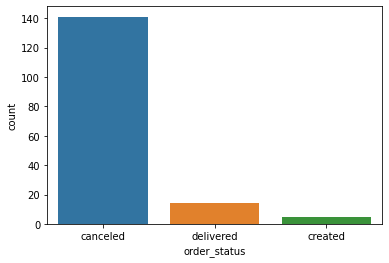

In [14]:
#Firstly let's consider with Nans in orders_dataset, because Nans in order_approved_at can be an indicator.

# check the order_status for Nans in orders_dataset
sns.countplot(x ='order_status' , data = orders_dataset[orders_dataset.order_approved_at.isna()]);

The majority of orders with Nan in orders_dataset has 'canceled' status. Some of orders have 'created' status that looks normal.Orders with status 'delivered' have to be considered.

In [15]:
#check that orders with NaN in order_approved_at have NaNs in order_delivered_carrier_date and order_delivered_customer_date too and their status
nan_orders_approved_df = orders_dataset[orders_dataset.order_approved_at.isna()] \
                        [[
                         'customer_id','order_approved_at',
                         'order_delivered_carrier_date' ,
                         'order_delivered_customer_date',
                         'order_status'
                         ]]

In [16]:
nan_orders_approved_df.shape

(160, 5)

In [17]:
nan_orders_approved_df[nan_orders_approved_df.order_status == 'delivered']
nan_orders_approved_df[nan_orders_approved_df.order_status == 'delivered'].shape[0]

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status
5323,2127dc6603ac33544953ef05ec155771,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,delivered
16567,4c1ccc74e00993733742a3c786dc3c1f,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,delivered
19031,2941af76d38100e0f8740a374f1a5dc3,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,delivered
22663,29c35fc91fc13fb5073c8f30505d860d,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,delivered
23156,1e101e0daffaddce8159d25a8e53f2b2,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,delivered
26800,684cb238dc5b5d6366244e0e0776b450,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,delivered
38290,68d081753ad4fe22fc4d410a9eb1ca01,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,delivered
39334,0bf35cac6cc7327065da879e2d90fae8,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,delivered
48401,d5de688c321096d15508faae67a27051,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,delivered
61743,a3d3c38e58b9d2dfb9207cab690b6310,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,delivered


14

It means that, some delivered orders have Nans in order_approved_at. May be it's a defect of data and there is two similar orders for one customer.  
146 orders with Nan in order_approved_at have NaNs in order_delivered_carrier_date and order_delivered_customer_date too and have 'canceled' or 'created' status.

In [18]:
#customer_unique_id for such orders
nan_customer_uniq_id_list = general_dataset[(general_dataset.order_status == 'delivered') &
                                             (general_dataset.order_approved_at.isna())].customer_unique_id.to_list()

In [19]:
general_dataset[general_dataset.customer_unique_id.isin(nan_customer_uniq_id_list)] \
    .groupby('customer_unique_id').order_id.count()

customer_unique_id
2e0a2166aa23da2472c6a60c4af6f7a6    2
5a4fa4919cbf2b049e72be460a380e5b    1
6ff8b0d7b35d5c945633b8d60165691b    1
79af1bbf230a2630487975aa5d7d6220    1
7e1a5ca61b572d76b64b6688b9f96473    1
8a9a08c7ca8900a200d83cf838a07e0b    1
91efb7fcabc17925099dced52435837f    1
bc1896dc77f49e6dec880445a9b443a3    1
c094ac95fcd52f821809ec232a7a6956    1
c4c0011e639bdbcf26059ddc38bd3c18    1
c8822fce1d0bfa7ddf0da24fff947172    1
d49f3dae6bad25d05160fc17aca5942d    1
e1f01a1bd6485e58ad3c769a5427d8a8    1
f79be7c08dd24b72d34634f1b89333a4    1
Name: order_id, dtype: int64

In [20]:
#Only one customer has two orders but they are look difference
general_dataset.query('customer_unique_id == "2e0a2166aa23da2472c6a60c4af6f7a6"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
31427,eb4c34f6c71f98b594e9df32d8e3c851,76cdbc077d1f0ab2a243edcb6dac3ec8,delivered,2017-10-29 10:19:49,2017-10-29 11:26:01,2017-10-30 23:07:48,2017-11-13 14:59:09,2017-11-17,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP


It means that, there is a defect in order. It is impossible to say that the purchase was made in this case.

In [21]:
#Secondly let's consider with difference between amount of order_id in order_items_dataset and order_dataset.

# list of unique order id in order_items_dataset
list_unique_orders = order_items_dataset.order_id.unique().tolist()


# Tabl 1 (order status of orders which are contained in both datasets) (have info about product)
orders_dataset[orders_dataset.order_id.isin(list_unique_orders)].order_status.value_counts()

# Table 2 (order status of orders which aren't contained in order_items_dataset) (don't have info about product)
orders_dataset[~orders_dataset.order_id.isin(list_unique_orders)].order_status.value_counts()

# Table 3 (order status of orders from orders_dataset) (all orders)
orders_dataset.order_status.value_counts()

delivered      96478
shipped         1106
canceled         461
invoiced         312
processing       301
unavailable        6
approved           2
Name: order_status, dtype: int64

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Orders with status 'created' from Table 2, it may seem that info about order are added when status become 'approved'.  

Strange orders from Table 2 and have status 'shipped', 'invoiced'.

Strange orders from Table 1 and have status 'unavailable'.

In [22]:
#Let's consider strange orders

orders_dataset[(~orders_dataset.order_id.isin(list_unique_orders)) & \
               (orders_dataset.order_status.isin(['shipped', 'invoiced']))]

orders_dataset[(orders_dataset.order_id.isin(list_unique_orders)) & \
               (orders_dataset.order_status.isin(['unavailable']))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
23254,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01
57591,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaT,NaT,2016-11-25
69926,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaT,NaT,2016-11-29


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
33157,dc18a044b56ed174037ca164cdf2e921,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29
50731,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24
60805,3c3ca08854ca922fe8e9cedfd6841c8a,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30
62504,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12
79275,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07
83645,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29


It means that, there is a defect in orders which were approved in one period 2016-10-(06 - 08).

In [23]:
orders_dataset[~orders_dataset.order_id.isin(list_unique_orders)].isna().sum() # nans in orders from Table 2

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                146
order_delivered_carrier_date     774
order_delivered_customer_date    775
order_estimated_delivery_date      0
dtype: int64

In [24]:
orders_dataset[(~orders_dataset.order_id.isin(list_unique_orders)) & 
               (orders_dataset.order_approved_at.isna())].order_status.value_counts()

canceled    141
created       5
Name: order_status, dtype: int64

146 orders with Nan in order_approved_at have NaNs in order_delivered_carrier_date and order_delivered_customer_date too, have 'canceled' or 'created' status and aren't contained in order_items_dataset as well.

**Conclusions after the analysis:**  
What indicators show that the purchase has been made?  
Order with non-na order_approved_at, all status (except 'unavailable' and 'canceled') and contained info about product indicate that purchase has been made.

## 3. How many users do we have who made a purchase only once?<a class="anchor" id="3-bullet"></a>
[back to the table of contents](#0-bullet)

In [25]:
#Filter df with conditions of purchase indicators
general_dataset_with_purchase = general_dataset[(~general_dataset.order_approved_at.isna()) & 
                                (~general_dataset.order_status.isin(['unavailable', 'canceled'])) &
                                (general_dataset.order_id.isin(list_unique_orders))]
general_dataset_with_purchase.shape

(98185, 12)

In [26]:
#number of users who made only one purchase
users_one_purchase = general_dataset_with_purchase \
    .groupby('customer_unique_id', as_index = False) \
    .order_id \
    .count() \
    .rename(columns = {'order_id' : 'count_of_orders'}) \
    .query('count_of_orders == 1') \
    .shape[0]

print(users_one_purchase)

92084


In [27]:
print('{} % of all customers made a purchase only once.' \
      .format(
             round(users_one_purchase * 100 / general_dataset_with_purchase.shape[0],2)
             )
     )

93.79 % of all customers made a purchase only once.


## 4. How many orders per month, on average, are not delivered for various reasons?<a class="anchor" id="4-bullet"></a>
[back to the table of contents](#0-bullet)

Check how many orders were delivered later than estimated_delivery_date.

In [28]:
general_dataset['diff_deliveres_estimated'] = general_dataset.order_estimated_delivery_date.dt.day - general_dataset_with_purchase.order_delivered_customer_date.dt.day 

In [29]:
general_dataset[general_dataset.diff_deliveres_estimated < 0].order_status.value_counts()

delivered    42946
Name: order_status, dtype: int64

Despite the delay, the order has the status 'delivered'. These orders should not be considered as not delivered.

Check the orders with 'unavailable' and 'canceled' status.

In [30]:
avg_number_of_undelivered_per_month = general_dataset[general_dataset.order_status.isin(['unavailable', 'canceled'])] \
                                      .groupby([general_dataset.order_estimated_delivery_date.dt.year.rename('year') , \
                                                general_dataset.order_estimated_delivery_date.dt.month_name().rename('month'),
                                                general_dataset.order_status]) \
                                      .agg({'order_id' : 'count'}) \
                                      .rename(columns={'order_id' : 'count_of_order'})\
                                      .reset_index()

avg_number_of_undelivered_per_status = avg_number_of_undelivered_per_month \
                                       .groupby(avg_number_of_undelivered_per_month.order_status, as_index=False) \
                                       .agg({'count_of_order' : 'mean'}) \
                                       .rename(columns={'count_of_order' : 'avg_count_of_order'})
    
                                      
avg_number_of_undelivered_per_status.avg_count_of_order = round(avg_number_of_undelivered_per_status.avg_count_of_order)

In [31]:
avg_number_of_undelivered_per_month.head(5)
avg_number_of_undelivered_per_status

,year,month,order_status,count_of_order
0,2016,December,canceled,8
1,2016,December,unavailable,2
2,2016,November,canceled,14
3,2016,November,unavailable,5
4,2016,October,canceled,3


,order_status,avg_count_of_order
0,canceled,24.0
1,unavailable,29.0


## 5. For each product, determine on which day of the week the product is most often bought.<a class="anchor" id="5-bullet"></a>
[back to the table of contents](#0-bullet)

For this task we will consider data with purchase.

In [32]:
dataset_with_purchase_product_info = general_dataset_with_purchase \
                                    .merge(order_items_dataset, on = 'order_id',  how = 'left')

In [33]:
dataset_with_purchase_product_info[dataset_with_purchase_product_info.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
40854,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
40855,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
40856,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [34]:
#table with purchase_frequency_per_week_day

purchase_frequency_per_week_day = dataset_with_purchase_product_info \
                                    .groupby([dataset_with_purchase_product_info.product_id,\
                                              dataset_with_purchase_product_info.order_approved_at.dt.day_name().rename('week_day')
                                             ])\
                                    .agg({'order_id' : 'count'})\
                                    .rename(columns={'order_id' : 'count_of_orders'}) \
                                    .reset_index()
                                    
purchase_frequency_per_week_day.head(5)

,product_id,week_day,count_of_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [35]:
#pivot table with purchase_frequency_per_week_day and find max values

pivot_table = purchase_frequency_per_week_day \
                            .pivot(index = 'product_id', columns='week_day', values='count_of_orders')\
                            .reset_index()\
                            .set_index('product_id')

pivot_table_with_max = pivot_table.max(axis=1).reset_index().rename(columns={ 0 : 'max_count_of_orders'}) 

In [36]:
#filter pivot table for max value (true/false)
is_max = pivot_table.eq(pivot_table.max(axis=1), axis=0)

In [37]:
#get final table with max value and best weekday for each product

best_week_day_for_product = is_max.dot(pivot_table.columns + " ") \
                                    .reset_index() \
                                    .rename(columns={ 0 : 'best_weekdays'}) 

best_week_day_for_product = best_week_day_for_product.merge(pivot_table_with_max, on='product_id', how='inner')

best_week_day_for_product[best_week_day_for_product.max_count_of_orders > 1].head(5)

,product_id,best_weekdays,max_count_of_orders
6,00126f27c813603687e6ce486d909d01,Sunday,2.0
7,001795ec6f1b187d37335e1c4704762e,Monday,3.0
9,001b72dfd63e9833e8c02742adf472e3,Thursday,4.0
11,00210e41887c2a8ef9f791ebc780cc36,Monday Saturday Sunday,2.0
12,002159fe700ed3521f46cfcf6e941c76,Saturday,2.0


In [38]:
#check on paricular product_id

purchase_frequency_per_week_day[purchase_frequency_per_week_day.product_id == 'ffef256879dbadcab7e77950f4f4a195']


best_week_day_for_product[best_week_day_for_product.product_id == 'ffef256879dbadcab7e77950f4f4a195']

,product_id,week_day,count_of_orders
60777,ffef256879dbadcab7e77950f4f4a195,Saturday,1
60778,ffef256879dbadcab7e77950f4f4a195,Tuesday,4


,product_id,best_weekdays,max_count_of_orders
32716,ffef256879dbadcab7e77950f4f4a195,Tuesday,4.0


## 6. How many purchases does each user make on average per week (by months)?  
<a class="anchor" id="6-bullet"></a>  

Do not forget that there may not be an integer number of weeks within a month.   
For example, November 2021 has 4.28 weeks. **And within the metrics, this must be taken into account.**

[back to the table of contents](#0-bullet)

For this task we will consider data with purchase.

In [39]:
#new df

df_for_purchases  = general_dataset_with_purchase[['order_id',
                                                   'customer_id',
                                                   'customer_unique_id',
                                                   'order_approved_at']].copy()

df_for_purchases['year'] = df_for_purchases.order_approved_at.dt.year
df_for_purchases['month'] = df_for_purchases.order_approved_at.dt.month_name()
df_for_purchases['weeks_in_month'] = df_for_purchases.order_approved_at.dt.days_in_month / 7

In [40]:
df_for_user = df_for_purchases\
             .groupby(['customer_unique_id',
                       'year',
                       'month',
                       'weeks_in_month'
                      ]) \
            .agg({'order_id' : 'count'})\
            .rename(columns={'order_id' : 'count_of_orders'}) \
            .reset_index()

df_for_user['avg_count_of_orders'] = df_for_user.count_of_orders / df_for_user.weeks_in_month

In [41]:
#check on paricular product_id
df_for_user[df_for_user.customer_unique_id == 'b4e4f24de1e8725b74e4a1f4975116ed']

,customer_unique_id,year,month,weeks_in_month,count_of_orders,avg_count_of_orders
68539,b4e4f24de1e8725b74e4a1f4975116ed,2018,February,4.000000,4,1.000000
68540,b4e4f24de1e8725b74e4a1f4975116ed,2018,March,4.428571,1,0.225806


## 7. Cohort analysis of users
 Between January and December, identify the cohort with the highest retention for the 3rd month. 
<a class="anchor" id="7-bullet"></a>  

[back to the table of contents](#0-bullet)

Information  - "93.79 % of all customers made a purchase only once" (which we get from step 3) helps us to predict that retention rate should be low.

We will divide all customer_unique_id into cohorts by the date of the first purchase.

For this task we will consider data with purchase.

In [42]:
#new df for determining time of first purchase for each unique customer

df_cohort  = general_dataset_with_purchase[['order_id', 'customer_id', 'customer_unique_id', 'order_approved_at']].copy()

In [43]:
#create an invoice month
#function for month


def get_month(x):
    return dt.datetime(x.year, x.month,1)


#apply the function 
df_cohort['invoice_month'] = df_cohort['order_approved_at'].apply(get_month) 

In [44]:
#create a column with date of first purchase for each customer(cohorts)

df_cohort['cohort_month'] =  df_cohort.groupby('customer_unique_id')['invoice_month'].transform('min')
df_cohort.head(3)

,order_id,customer_id,customer_unique_id,order_approved_at,invoice_month,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-01,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-01,2018-08-01


In [45]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 


# get date elements for our cohort and invoice columns
_,order_month,order_year =  get_date_elements(df_cohort,'invoice_month')
_,cohort_month,cohort_year =  get_date_elements(df_cohort,'cohort_month')

In [46]:
df_cohort.head(3)

,order_id,customer_id,customer_unique_id,order_approved_at,invoice_month,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-01,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-01,2018-08-01


In [47]:
#create a cohort index 
year_diff = order_year - cohort_year
month_diff = order_month - cohort_month
df_cohort['cohort_index'] = year_diff*12+month_diff+1
df_cohort.head()

,order_id,customer_id,customer_unique_id,order_approved_at,invoice_month,cohort_month,cohort_index
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,2018-07-01,2018-07-01,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,2018-08-01,2018-08-01,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-01,2017-11-01,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,2018-02-01,2018-02-01,1


In [48]:
#count the customer_unique_id by grouping by cohort_month  and cohort_index 
cohort_data = df_cohort.groupby(['cohort_month','cohort_index']) \
                        ['customer_unique_id'].apply(pd.Series.nunique)\
                        .reset_index()


cohort_data = cohort_data.rename(columns = {'customer_unique_id' : 'count_of_customer_unique_id'})
cohort_data.head()

,cohort_month,cohort_index,count_of_customer_unique_id
0,2016-09-01,1,1
1,2016-10-01,1,288
2,2016-10-01,7,1
3,2016-10-01,10,1
4,2016-10-01,12,1


In [49]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='cohort_month', columns=['cohort_index'],values='count_of_customer_unique_id')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,288.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2301.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05-01,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06-01,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [50]:
#cohort table for retention
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,1.0,NaN,NaN,NaN,NaN,NaN,0.003472,NaN,NaN,0.003472,NaN,0.003472,NaN,0.003472,NaN,0.003472,NaN,0.003472,0.006944,0.006944
2016-12-01,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.002793,0.002793,0.006983,0.004190,0.001397,0.001397,0.002793,0.004190,0.001397,NaN
2017-02-01,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,0.002987,0.001195,0.001792,0.001195,0.000597,0.000597,0.002389,NaN,NaN
2017-03-01,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326,0.001163,0.001550,0.002326,0.000775,0.001550,NaN,NaN
2017-04-01,1.0,0.006084,0.002173,0.001738,0.002608,0.002608,0.003477,0.002608,0.003477,0.001738,0.002173,0.000869,0.000869,0.000435,0.000869,0.000869,0.001304,NaN,NaN,NaN
2017-05-01,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976,0.000564,0.001976,0.002258,NaN,NaN,NaN,NaN
2017-06-01,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608,0.001286,0.001929,NaN,NaN,NaN,NaN,NaN


In [51]:
#cohort_month with the highest retention for the 3rd month
new_cohort_table[new_cohort_table[3] == new_cohort_table.reset_index()[3].max()][3]

cohort_month
2017-09-01    0.004882
Name: 3, dtype: float64

## 8. RFM user segmentation
RFM segmentation of users in order to qualitatively evaluate your audience.  

Clustering metrics:  

R - time from the last purchase of the user to the current date,  
F - the total number of purchases from the user for all time,  
M - the amount of purchases for all time 

<a class="anchor" id="7-bullet"></a>  

[back to the table of contents](#0-bullet)

For this task we will consider dataset with purchase and product info.

What is the time frame of the data?

In [283]:
print('Orders from {} to {}'.format(dataset_with_purchase_product_info['order_approved_at'].min(),
                                    dataset_with_purchase_product_info['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


In [284]:
dataset_with_purchase_product_info.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [285]:
#Check orders with max rows

dataset_with_purchase_product_info['order_id'].value_counts().sort_values(ascending = False).head(5)

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
Name: order_id, dtype: int64

Orders can have multiple rows (one row per item).

In [286]:
#order dataframe that will aggregate our sales at the order level.


orders = dataset_with_purchase_product_info.groupby(['customer_unique_id',
                                                     'order_id', 
                                                     'order_approved_at']) \
                                           .agg({'price': lambda x: x.sum()}) \
                                           .reset_index()
orders.head()

,customer_unique_id,order_id,order_approved_at,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00


As **NOW** date i will take one day after the last purchase. This date will be used as a reference to calculate the **Recency score**.

As a period i will take all days from 2016-09-15 to 2018-09-03.

In [287]:
NOW = orders['order_approved_at'].max() + timedelta(days=1)
period = (dataset_with_purchase_product_info['order_approved_at'].max() - \
                dataset_with_purchase_product_info['order_approved_at'].min())

print('NOW = {} and period = {} days'.format(NOW.date() , period.days))

NOW = 2018-09-04 and period = 718 days


In [288]:
#сalculate the Recency, Frequency and Monetary Value of each customers


#column with the number of days between the purchase and now

orders['days_since_order'] = orders['order_approved_at'].apply(lambda x: (NOW - x).days)

aggr = {
    'days_since_order': lambda x: x.min(),  # the number of days since last order (Recency)
    'order_approved_at': lambda x: len(x), # the total number of orders in the last period (Frequency)
    'price':  lambda x: sum(x), #monetary value of each customer
}
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 
                    'order_approved_at': 'Frequency',
                    'price' : 'Monetary'}, inplace=True)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [289]:
#for determining the scale for each parameter let's consider the variaty of values:

for i in ['Recency','Frequency', 'Monetary']:
    print('Counts of values for **{}**.'.format('\033[1m' + i + "\033[0;0m"))
    rfm[i].value_counts().head(10)

Counts of values for **Recency**.


132    1065
283     872
61      631
284     591
280     515
119     436
28      429
273     413
35      385
118     383
Name: Recency, dtype: int64

Counts of values for **Frequency**.


1     92084
2      2650
3       188
4        29
5         9
6         5
7         3
16        1
9         1
Name: Frequency, dtype: int64

Counts of values for **Monetary**.


59.90    1603
69.90    1493
49.90    1335
89.90    1153
99.90    1128
79.90     939
39.90     904
29.90     896
19.90     865
29.99     825
Name: Monetary, dtype: int64

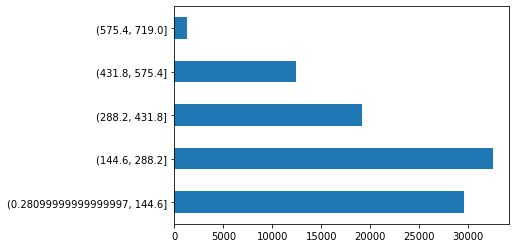

In [290]:
rfm['Recency'].value_counts(sort=False, bins=5).plot.barh()

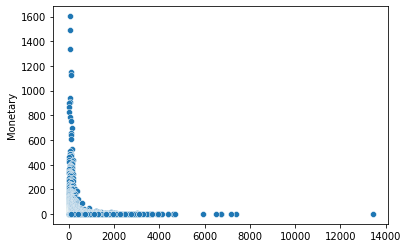

In [291]:
sns.scatterplot(x = rfm['Monetary'].value_counts().index, y = rfm['Monetary'].value_counts())

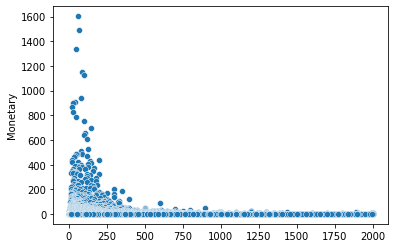

In [292]:
sns.scatterplot(x = rfm[rfm['Monetary'] < 2000] \
                        ['Monetary']\
                        .value_counts()\
                        .index, 
                y = rfm[rfm['Monetary'] < 2000] \
                        ['Monetary']\
                        .value_counts())

In [293]:
# for customers who has 1 - 100 days since last order : 5
# for customers who has 100 - 200 days since last order : 4
# for customers who has 200 - 300 days since last order : 3
# for customers who has 300 - 400 days since last order : 2
# for customers who has more than 400 days since last order : 1


rfm['R'] = pd.cut(rfm['Recency'], bins=[1, 100, 200, 300, 400, float('inf')], labels=range(5,0,(-1)))
rfm['R']

0        4
1        4
2        1
3        2
4        3
        ..
94965    1
94966    3
94967    1
94968    4
94969    1
Name: R, Length: 94970, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [294]:
# for customers who has 1 order in period : 1
# for customers who has 2 orders in period : 2
# for customers who has 3 orders in period : 3
# for customers who has 4 - 10 orders in period : 4
# for customers who has more than 10 orders in period : 5


rfm['F'] = pd.cut(rfm['Frequency'], bins=[0, 2, 3, 4, 10, float('inf')], labels=range(1,6))
rfm['F']

0        1
1        1
2        1
3        1
4        1
        ..
94965    1
94966    1
94967    1
94968    1
94969    1
Name: F, Length: 94970, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [295]:
# revenue from customers in period  from 1 to 250 : 1
# revenue from customers in period  from 250 to 500 : 2
# revenue from customers in period  from 500 to 1000 : 3
# revenue from customers in period  from 1000 to 5000: 4
# revenue from customers in period  more 5000 : 5

rfm['M'] = pd.cut(rfm['Monetary'], bins=[1, 250, 500, 1000, 5000, float('inf')], labels=range(1,6))
rfm['M']

0        1
1        1
2        1
3        1
4        1
        ..
94965    4
94966    1
94967    1
94968    1
94969    1
Name: M, Length: 94970, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [302]:
rfm['R'] = rfm['R'].astype("str")
rfm['F'] = rfm['F'].astype("str")
rfm['M'] = rfm['M'].astype("str")

In [303]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94970 entries, 0 to 94969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94970 non-null  object 
 1   Recency             94970 non-null  int64  
 2   Frequency           94970 non-null  int64  
 3   Monetary            94970 non-null  float64
 4   R                   94970 non-null  object 
 5   F                   94970 non-null  object 
 6   M                   94970 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB


In [304]:
rfm['R'] = rfm['R'].apply(lambda x : x.replace(".0", ""))
rfm['F'] = rfm['F'].apply(lambda x : x.replace(".0", ""))
rfm['M'] = rfm['M'].apply(lambda x : x.replace(".0", ""))

In [305]:
rfm['RFM Score'] = rfm['R'] + rfm['F'] + rfm['M']
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,1,411
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,3,1,1,311


In [306]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'] + rfm['F']
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,1,411,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,3,1,1,311,about to sleep
